In [1]:
#Import all required packages and supress warnings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [3]:
# Read CSV Data
bike=pd.read_csv('day.csv')

In [4]:
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Drop the variables that have no effect on calculation
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
bike[['season']]=bike[['season']].apply(lambda x : x.map({1:'spring', 2:'summer',3:'fall',4:'winter'}))
bike[['mnth']]=bike[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))
bike[['weekday']]=bike[['weekday']].apply(lambda x : x.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}))
bike[['weathersit']]=bike[['weathersit']].apply(lambda x : x.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'}))



bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 2000x2000 with 0 Axes>

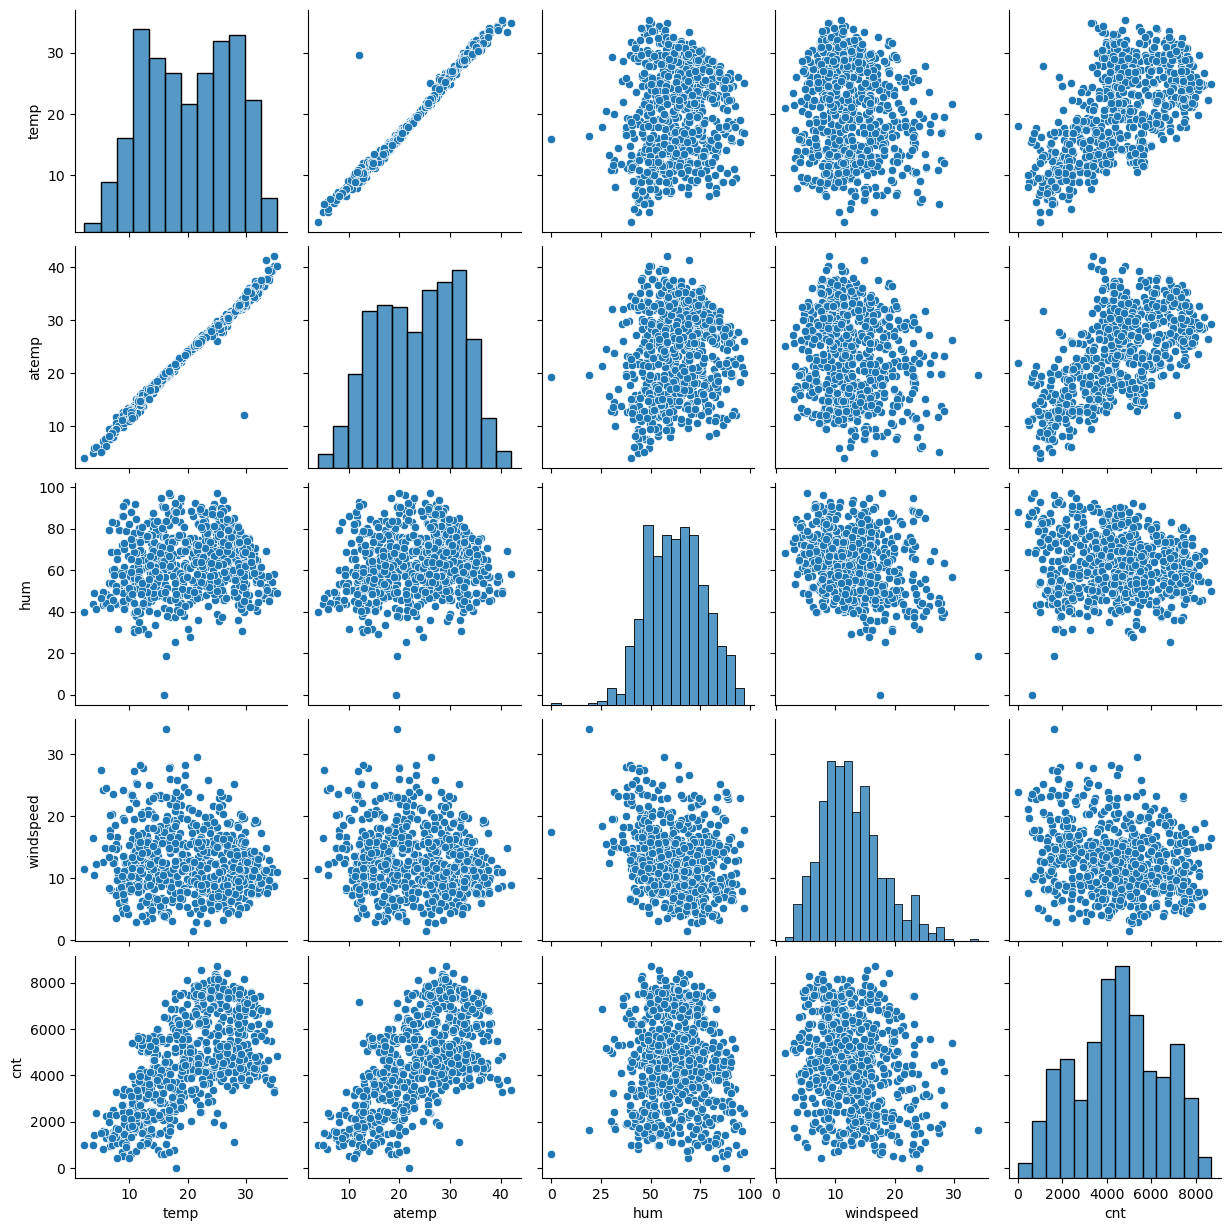

In [10]:
#visualising numeric variables
plt.figure(figsize=(20,20))
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

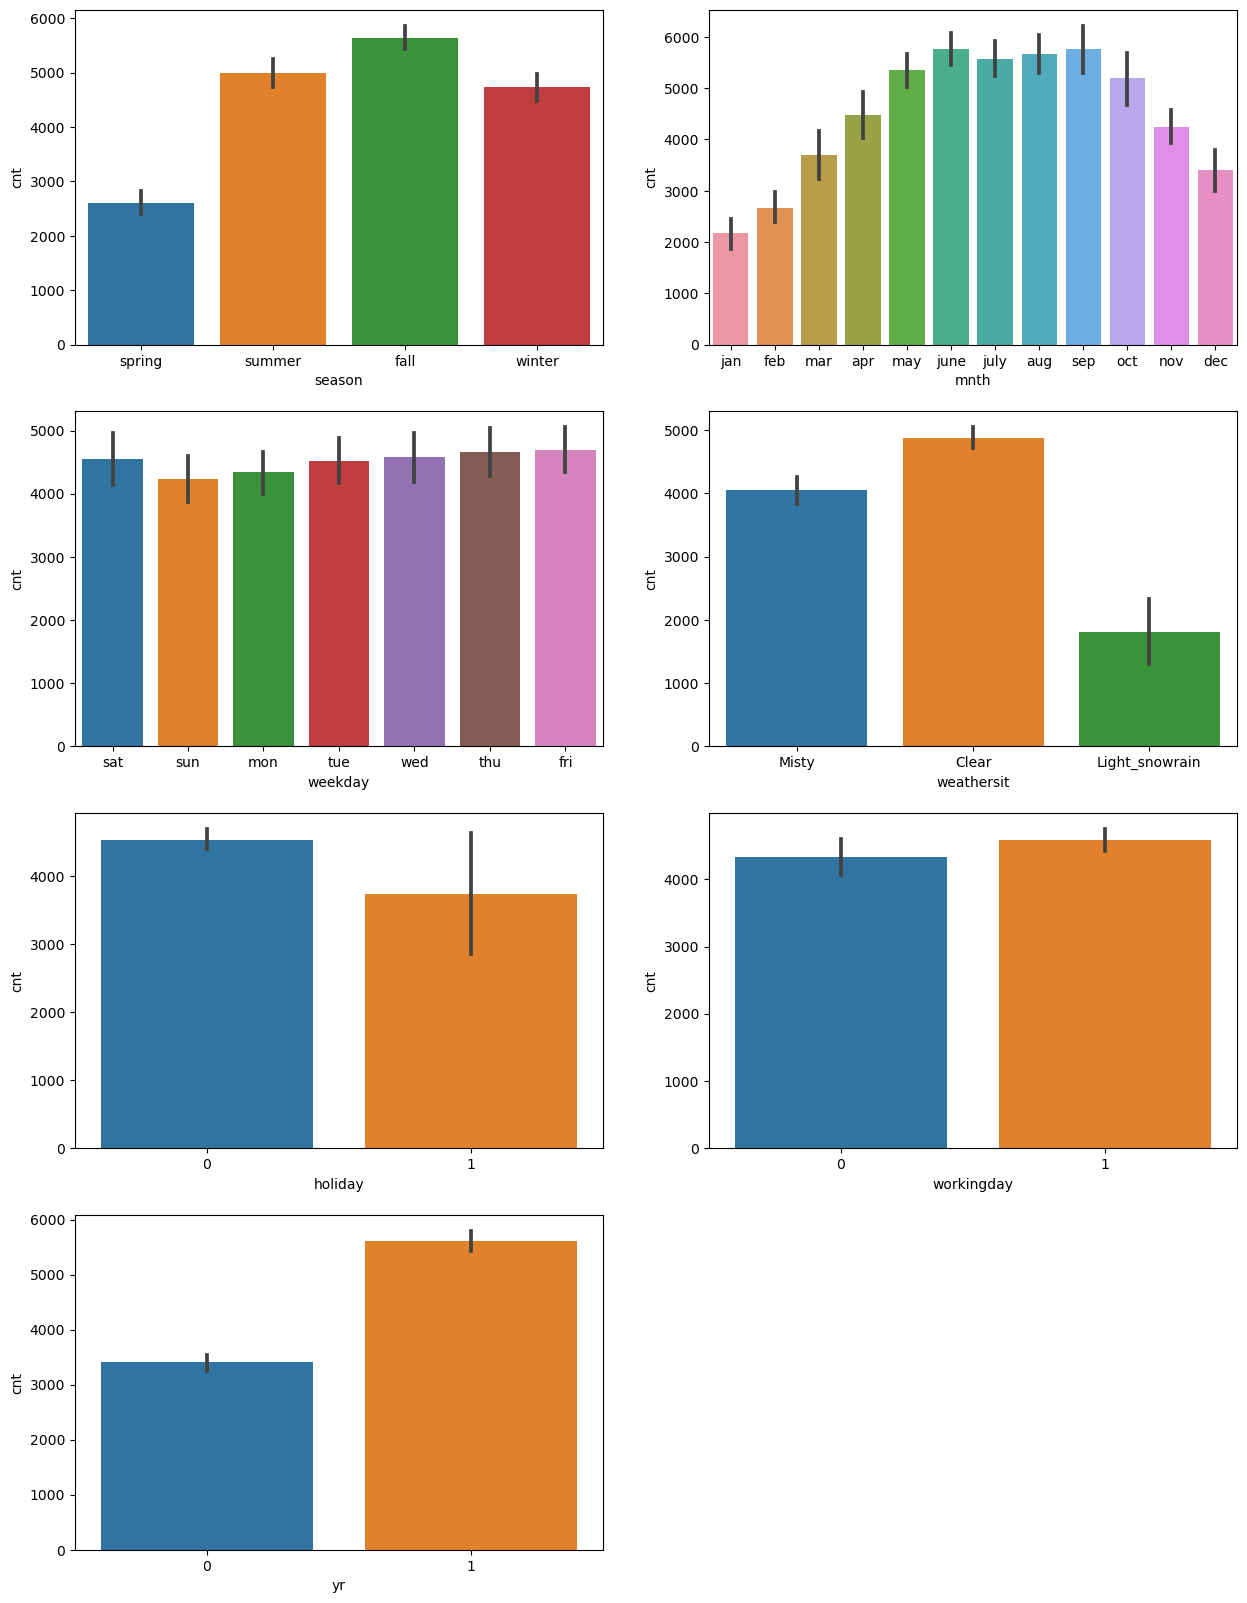

In [11]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.barplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.barplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.barplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.barplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.barplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.barplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

Observations
- Highest Booking were in the fall
- Booking are found to increase till june and is almost constant till september and then drops till december.
- Booking increase all the way from sunday till saturday with lowest on sunday
- Higher Bookings on clear weather
- lower booking are seen on holidays and doesent seem to be affected by working day or not
- Higher bookings seen on 2019

In [12]:
# Dummy Variable created for month,weekday,weathersit,season 
months_df=pd.get_dummies(bike.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
season_df=pd.get_dummies(bike.season,drop_first=True)

In [13]:
bike_new = pd.concat([bike,months_df,weekdays_df,weathersit_df,season_df],axis=1)

In [14]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [15]:
# Drop the columns after dummy variable creation 
pd.set_option('display.max_columns', None)
bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [16]:
#split the data into test and train set

df_train,df_test=train_test_split(bike_new,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [17]:
#MinMax scaler used for rescaling numeric variables
scaler=MinMaxScaler()
num_vars=['temp','atemp','hum','windspeed','cnt']
#fir
df_train[num_vars]

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.14480,70.4167,11.083475,7216
426,16.980847,20.67460,62.1250,10.792293,4066
728,10.489153,11.58500,48.3333,23.500518,1796
482,15.443347,18.87520,48.9583,8.708325,4220
111,13.803347,16.09770,72.9583,14.707907,1683
...,...,...,...,...,...
578,30.852500,35.35440,65.9583,8.666718,7261
53,9.091299,12.28585,42.3043,6.305571,1917
350,10.591653,12.46855,56.0833,16.292189,2739
79,17.647835,20.48675,73.7391,19.348461,2077


In [18]:
#fittransform on dataset
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head(5)
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


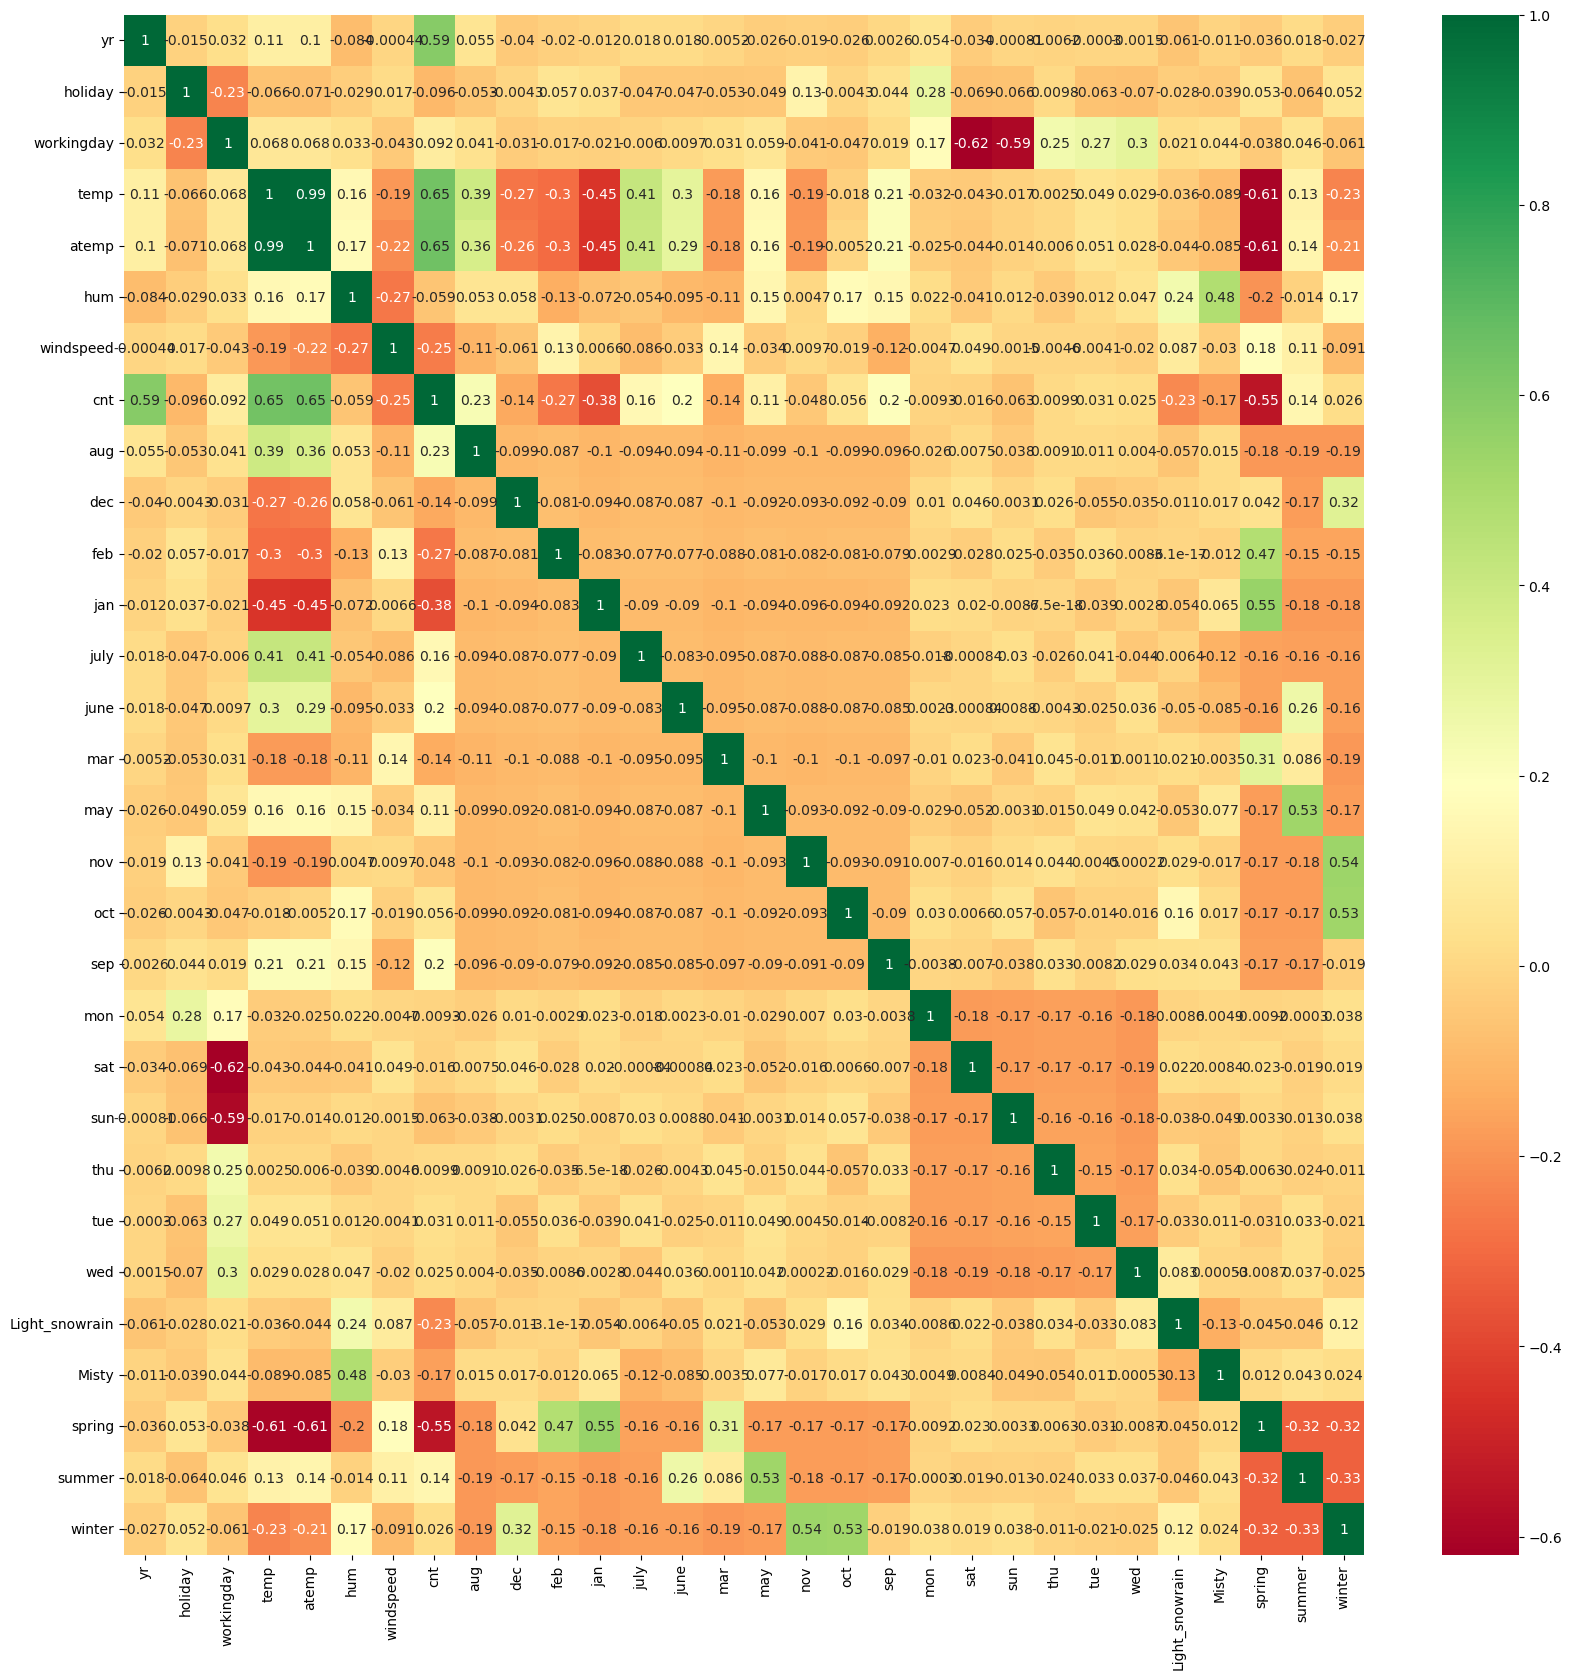

In [20]:
#study correleation coefficient to see which variables are correlated the most
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True, cmap="RdYlGn")
plt.show()

In [21]:
# Using Recursive feature elimination and selecting top 15 variables
y_train=df_train.pop('cnt')

In [22]:
x_train=df_train

In [23]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [24]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [25]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [26]:
col = x_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [27]:
# checking rejected columns

x_train.columns[~rfe.support_]


Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [28]:
# function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [29]:
#RFE selected variables

x_train_rfe = x_train[col]

# Calculate VIF

calculateVIF(x_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,sat,9.96
10,sun,9.67
13,spring,2.55
1,holiday,2.54
5,hum,1.90
14,winter,1.79
12,Misty,1.57


In [30]:
#Build First Linear Regression Model
x_train_lrm_1=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_lrm_1)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.89e-189
Time:                        21:53:00   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.587      0.000       0.193       0.292
yr                 0.2309      0.008     28.456      0.000       0.215       0.247
holiday           -0.0076      0.021     -0.354      0.723      -0.049       0.034
workingday         0.0942      0.009     10.146      0.000       0.076       0.112
temp               0.3613      0.129      2.811      0.005       0.109       0.614
atemp              0.1257      0.135      0.932      0.352      -0.139       0.391
hum               -0.1505      0.038     -3.990      0.000      -0.225      -0.076
windspeed         -0.1648      0.026     -6.375      0.000      -0.216      -0.114
july              -0.0780      0.017     -4.565      0.000      -0.112      -0.044
sep                0.0594      0.015      3.843      0.000       0.029       0.090
sat                0.1040      0.011      9.119      0.000       0.082       0.126
sun                0.0515      0.012      4.290      0.000       0.028       0.075
Light_snowrain    -0.2480      0.026     -9.377      0.000      -0.300      -0.196
Misty             -0.0575      0.011     -5.465      0.000      -0.078      -0.037
spring            -0.1078      0.015     -7.264      0.000      -0.137      -0.079
winter             0.0549      0.012      4.441      0.000       0.031       0.079
==============================================================================
Omnibus:                       62.426   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.374
Skew:                          -0.622   Prob(JB):                     2.47e-35
Kurtosis:                       5.440   Cond. No.                     2.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
# As temp shows high VIF values hence we can drop it
x_train_new = x_train_rfe.drop(['temp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
2,workingday,40.70
8,sat,9.93
9,sun,9.65
3,atemp,2.92
1,holiday,2.53
12,spring,2.49
4,hum,1.90
13,winter,1.71
11,Misty,1.57
6,july,1.29


In [32]:
#Build First Linear Regression Model
x_train_lrm_2=sm.add_constant(x_train_new)
lr=sm.OLS(y_train,x_train_lrm_2)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.04e-188
Time:                        21:53:00   Log-Likelihood:                 507.32
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     496   BIC:                            -927.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2464      0.025      9.701      0.000       0.197       0.296
yr                 0.2318      0.008     28.386      0.000       0.216       0.248
holiday           -0.0044      0.021     -0.205      0.837      -0.047       0.038
workingday         0.0947      0.009     10.131      0.000       0.076       0.113
atemp              0.4941      0.032     15.278      0.000       0.431       0.558
hum               -0.1514      0.038     -3.985      0.000      -0.226      -0.077
windspeed         -0.1540      0.026     -5.984      0.000      -0.205      -0.103
july              -0.0737      0.017     -4.296      0.000      -0.107      -0.040
sep                0.0615      0.016      3.960      0.000       0.031       0.092
sat                0.1045      0.011      9.096      0.000       0.082       0.127
sun                0.0516      0.012      4.267      0.000       0.028       0.075
Light_snowrain    -0.2443      0.027     -9.186      0.000      -0.297      -0.192
Misty             -0.0579      0.011     -5.472      0.000      -0.079      -0.037
spring            -0.1141      0.015     -7.726      0.000      -0.143      -0.085
winter             0.0477      0.012      3.919      0.000       0.024       0.072
==============================================================================
Omnibus:                       60.937   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.240
Skew:                          -0.586   Prob(JB):                     7.97e-37
Kurtosis:                       5.540   Cond. No.                     2.67e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
# As workingday shows high VIF values hence we can drop it
x_train_new = x_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
3,hum,23.08
2,atemp,15.30
4,windspeed,3.99
11,spring,2.50
10,Misty,2.26
0,yr,2.05
12,winter,2.03
5,july,1.39
7,sat,1.23
8,sun,1.23


In [34]:
#Build Third Linear Regression Model
x_train_lrm_3=sm.add_constant(x_train_new)
lr=sm.OLS(y_train,x_train_lrm_3)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.04e-188
Time:                        21:53:00   Log-Likelihood:                 507.32
No. Observations:                 510   AIC:                            -986.6
Df Residuals:                     496   BIC:                            -927.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3412      0.031     10.947      0.000       0.280       0.402
yr                 0.2318      0.008     28.386      0.000       0.216       0.248
holiday           -0.0991      0.026     -3.832      0.000      -0.150      -0.048
atemp              0.4941      0.032     15.278      0.000       0.431       0.558
hum               -0.1514      0.038     -3.985      0.000      -0.226      -0.077
windspeed         -0.1540      0.026     -5.984      0.000      -0.205      -0.103
july              -0.0737      0.017     -4.296      0.000      -0.107      -0.040
sep                0.0615      0.016      3.960      0.000       0.031       0.092
sat                0.0098      0.011      0.858      0.391      -0.013       0.032
sun               -0.0431      0.012     -3.664      0.000      -0.066      -0.020
Light_snowrain    -0.2443      0.027     -9.186      0.000      -0.297      -0.192
Misty             -0.0579      0.011     -5.472      0.000      -0.079      -0.037
spring            -0.1141      0.015     -7.726      0.000      -0.143      -0.085
winter             0.0477      0.012      3.919      0.000       0.024       0.072
==============================================================================
Omnibus:                       60.937   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.240
Skew:                          -0.586   Prob(JB):                     7.97e-37
Kurtosis:                       5.540   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# As hum shows high VIF values hence we can drop it
x_train_new = x_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
2,atemp,4.64
3,windspeed,3.95
0,yr,2.05
10,spring,1.66
9,Misty,1.52
11,winter,1.43
4,july,1.35
6,sat,1.23
7,sun,1.21
5,sep,1.20


In [36]:
#Build Fourth Linear Regression Model
x_train_lrm_4=sm.add_constant(x_train_new)
lr=sm.OLS(y_train,x_train_lrm_4)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.92e-186
Time:                        21:53:00   Log-Likelihood:                 499.28
No. Observations:                 510   AIC:                            -972.6
Df Residuals:                     497   BIC:                            -917.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2608      0.024     10.815      0.000       0.213       0.308
yr                 0.2354      0.008     28.585      0.000       0.219       0.252
holiday           -0.1000      0.026     -3.809      0.000      -0.152      -0.048
atemp              0.4627      0.032     14.535      0.000       0.400       0.525
windspeed         -0.1262      0.025     -5.021      0.000      -0.176      -0.077
july              -0.0664      0.017     -3.839      0.000      -0.100      -0.032
sep                0.0582      0.016      3.697      0.000       0.027       0.089
sat                0.0114      0.012      0.992      0.322      -0.011       0.034
sun               -0.0461      0.012     -3.864      0.000      -0.070      -0.023
Light_snowrain    -0.2863      0.025    -11.554      0.000      -0.335      -0.238
Misty             -0.0822      0.009     -9.372      0.000      -0.099      -0.065
spring            -0.1181      0.015     -7.894      0.000      -0.147      -0.089
winter             0.0387      0.012      3.188      0.002       0.015       0.063
==============================================================================
Omnibus:                       64.245   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.345
Skew:                          -0.631   Prob(JB):                     2.78e-37
Kurtosis:                       5.515   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# As sat shows high VIF values hence we can drop it
x_train_new = x_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,yr,2.05
9,spring,1.65
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


In [38]:
#Build Fifth Linear Regression Model
x_train_lrm_5=sm.add_constant(x_train_new)
lr=sm.OLS(y_train,x_train_lrm_5)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          5.18e-187
Time:                        21:53:00   Log-Likelihood:                 498.77
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     498   BIC:                            -922.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2629      0.024     10.948      0.000       0.216       0.310
yr                 0.2351      0.008     28.569      0.000       0.219       0.251
holiday           -0.1023      0.026     -3.911      0.000      -0.154      -0.051
atemp              0.4619      0.032     14.516      0.000       0.399       0.524
windspeed         -0.1251      0.025     -4.981      0.000      -0.174      -0.076
july              -0.0660      0.017     -3.815      0.000      -0.100      -0.032
sep                0.0584      0.016      3.706      0.000       0.027       0.089
sun               -0.0483      0.012     -4.115      0.000      -0.071      -0.025
Light_snowrain    -0.2863      0.025    -11.553      0.000      -0.335      -0.238
Misty             -0.0823      0.009     -9.376      0.000      -0.100      -0.065
spring            -0.1180      0.015     -7.887      0.000      -0.147      -0.089
winter             0.0391      0.012      3.216      0.001       0.015       0.063
==============================================================================
Omnibus:                       60.675   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.267
Skew:                          -0.586   Prob(JB):                     2.14e-36
Kurtosis:                       5.522   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# F-Statistics value of 229.6  and the prob(F-Stat) of 5.18e-187 i.e almost equals to zero, states that the overall model is significant also p-value for all the features is almost 0.0 

In [39]:
x_train_lrm_5
y_train_pred = lr_model.predict(x_train_lrm_5)

Text(0.5, 0, 'Errors')

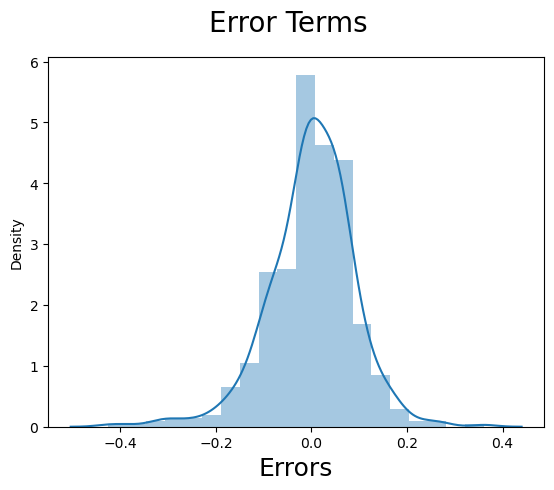

In [40]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [41]:
calculateVIF(x_train_new)

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,yr,2.05
9,spring,1.65
8,Misty,1.52
10,winter,1.41
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


# Making Predictions Using the Final Model

In [42]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [43]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
y_test = df_test.pop('cnt')
x_test = df_test

In [45]:
col1 = x_train_new.columns

x_test = x_test[col1]

# Adding constant variable to test dataframe
x_test_lrm_1 = sm.add_constant(x_test)

In [46]:
y_pred = lr_model.predict(x_test_lrm_1)

In [47]:
r2 = r2_score(y_test, y_pred)
round(r2,5)

0.81288

# Evaluating Model

In [48]:
round(lr_model.params,4)

const             0.2629
yr                0.2351
holiday          -0.1023
atemp             0.4619
windspeed        -0.1251
july             -0.0660
sep               0.0584
sun              -0.0483
Light_snowrain   -0.2863
Misty            -0.0823
spring           -0.1180
winter            0.0391
dtype: float64

## Final Eq for cnt = 0.2464 + 0.2318 x yr - 0.0044 x holiday + 0.0947 x workingday + 0.4941 x atemp - 0.1514 x hum - 0.154 x windspeed - 0.0737 x july + 0.0615 x sep + 0.1045 x sat + 0.0516 x sun - 0.2443 x Light_snowrain - 0.0579 x Misty - 0.1141 x spring + 0.0477 x winter 

In [49]:
#  Adjusted-R2 value for  test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.803


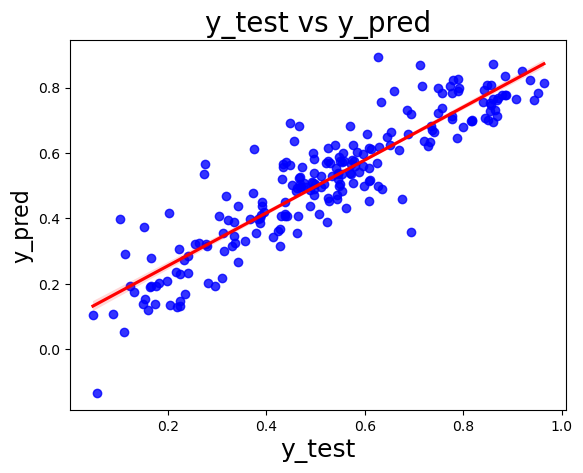

In [50]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Test and Train Dataset R2 and Adjusted R2 comparison

- Train dataset R2          : 0.835
- Test dataset R           : 0.81288
- Train dataset Adjusted R2 : 0.829    
- Test dataset Adjusted R2  : 0.832

Demand of bikes depend on yr , holiday,atemp,windspeed,july,sep,sun,Light_snowrain,Misty , spring, winter           